In [27]:
from ogs6py.ogs import OGS
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [28]:
model_mc=OGS(INPUT_FILE="load_test_mc_nonassociated.prj", PROJECT_FILE="load_test_mc_nonassociated.prj")
model_dp=OGS(INPUT_FILE="load_test_dp_nonassociated.prj", PROJECT_FILE="load_test_dp_nonassociated.prj")

In [29]:
model_mc.replace_parameter_value(name="DilatancyAngle", value=10)
model_mc.write_input()

True

In [30]:
model_dp.replace_parameter_value(name="DilatancyParameter", value=0.1)
model_dp.write_input()

True

In [31]:
model_mc.run_model(path='~/ogs_release/bin')

OGS finished with project file load_test_mc_nonassociated.prj.
Execution took 0.9513590335845947 s


In [32]:
model_dp.run_model(path='~/ogs_release/bin')

OGS finished with project file load_test_dp_nonassociated.prj.
Execution took 1.0126352310180664 s


In [33]:
pvd_mc = vtuIO.PVDIO("load_test_mc.pvd", dim=2)
pvd_dp = vtuIO.PVDIO("load_test_dp.pvd", dim=2)

slight changes of interpolated values if defaults are/were used.
slight changes of interpolated values if defaults are/were used.


In [34]:
pts = {"pt0": (1000,500,0.0)}

In [35]:
results_mc = {}
results_dp = {}

In [36]:
results_mc["displacement"] = pvd_mc.read_time_series("displacement", pts=pts)
results_dp["displacement"] = pvd_dp.read_time_series("displacement", pts=pts)

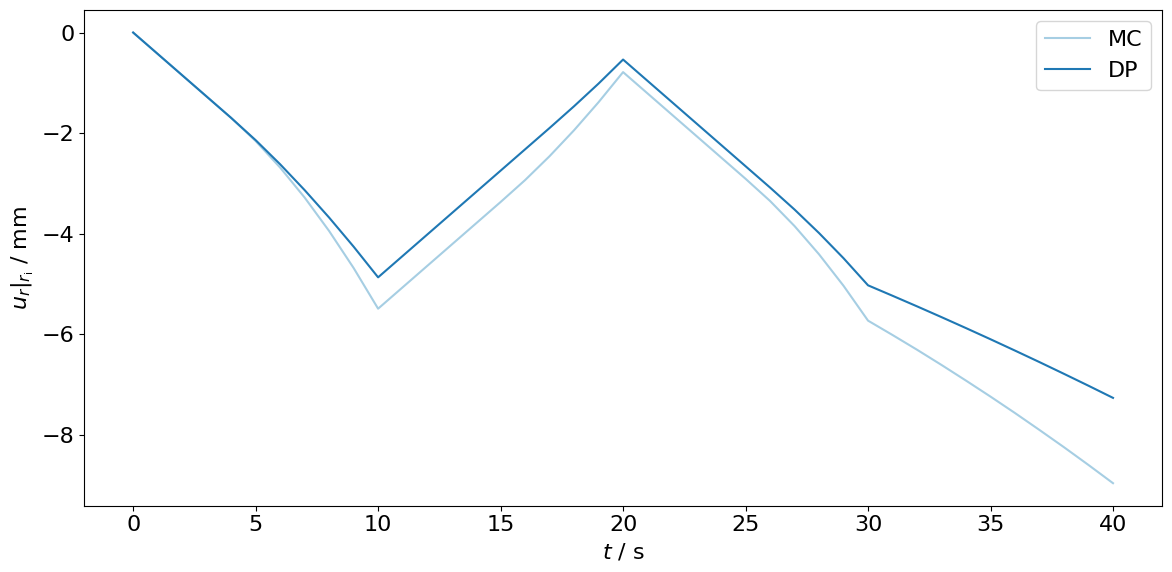

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(pvd_mc.timesteps,results_mc['displacement']['pt0'].T[0],label='MC')
ax.plot(pvd_dp.timesteps,results_dp['displacement']['pt0'].T[0],label='DP')
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$u_r|_{r_\\mathrm{i}}$ / mm')
ax.legend()
fig.tight_layout();

In [38]:
raxis =  [(i,500,0) for i in np.linspace(start=1000, stop=2000, num=100)]

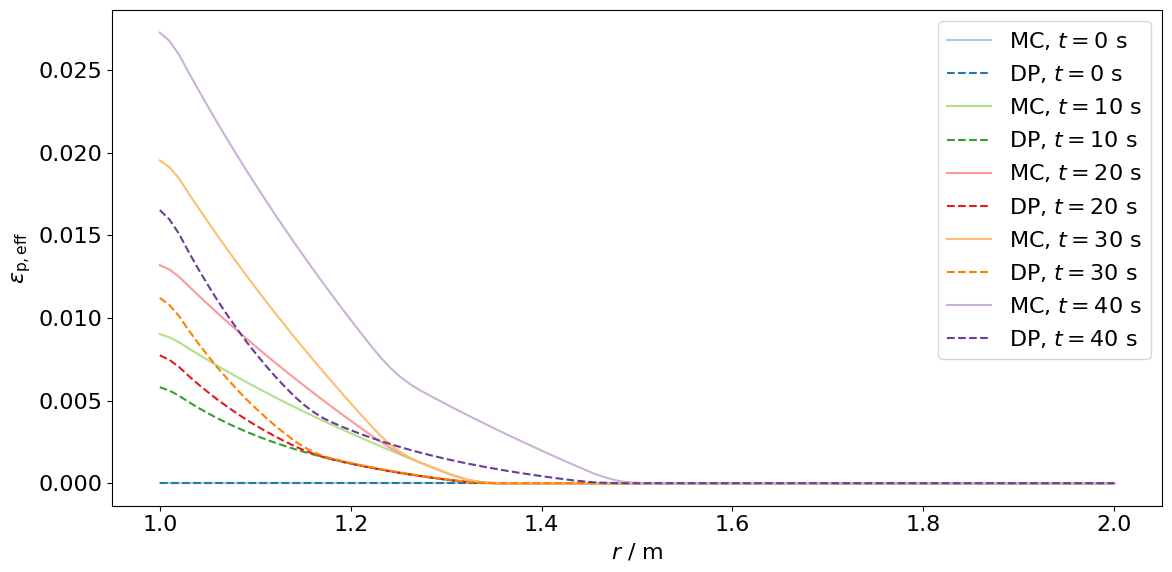

In [39]:
sns.set_palette("Paired",n_colors=10)
fig, ax = plt.subplots(figsize=(12,6))
for i in [0,10,20,30,40]:
    ax.plot(np.array(raxis).T[0]/1000,pvd_mc.read_set_data(i, 'EquivalentPlasticStrain', pointsetarray=raxis),
            label='MC, $t = %i$ s' %i)
    ax.plot(np.array(raxis).T[0]/1000,pvd_dp.read_set_data(i, 'EquivalentPlasticStrain', pointsetarray=raxis),
            label='DP, $t = %i$ s' %i, ls='--')

ax.set_xlabel('$r$ / m')
ax.set_ylabel('$\\epsilon_\\mathrm{p,eff}$')
ax.legend()
fig.tight_layout();

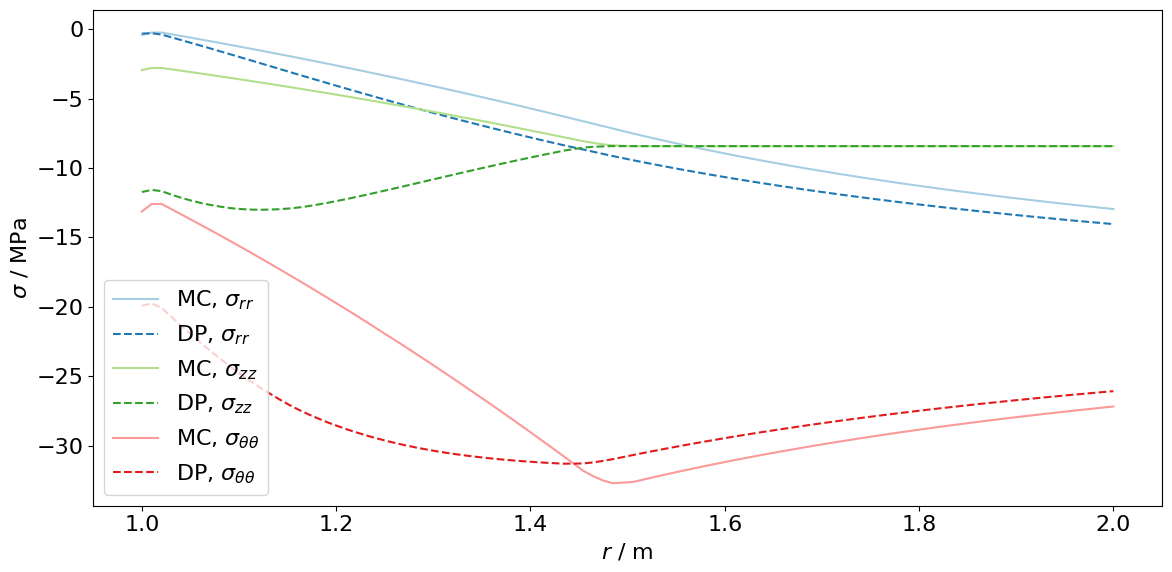

In [40]:
sns.set_palette("Paired",n_colors=10)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.array(raxis).T[0]/1000,pvd_mc.read_set_data(i, 'sigma', pointsetarray=raxis).T[0],
            label='MC, $\\sigma_{rr}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_dp.read_set_data(i, 'sigma', pointsetarray=raxis).T[0],
            label='DP, $\\sigma_{rr}$', ls='--')

ax.plot(np.array(raxis).T[0]/1000,pvd_mc.read_set_data(i, 'sigma', pointsetarray=raxis).T[1],
            label='MC, $\\sigma_{zz}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_dp.read_set_data(i, 'sigma', pointsetarray=raxis).T[1],
            label='DP, $\\sigma_{zz}$', ls='--')

ax.plot(np.array(raxis).T[0]/1000,pvd_mc.read_set_data(i, 'sigma', pointsetarray=raxis).T[2],
            label='MC, $\\sigma_{\\theta\\theta}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_dp.read_set_data(i, 'sigma', pointsetarray=raxis).T[2],
            label='DP, $\\sigma_{\\theta\\theta}$', ls='--')

ax.set_xlabel('$r$ / m')
ax.set_ylabel('$\\sigma$ / MPa')
ax.legend()
fig.tight_layout();